<a href="https://colab.research.google.com/github/JuliRossi/Clasificacion-de-Vacas-IA/blob/main/v1_prototipo_RNA_MLP_tipo_vaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema inteligente con Red neuronal artificial MLP que clasifica 4 tipos de vacas por patrones de imagenes

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

NOTA: Para ejecutarlo, verificar los paths de carga de todas las imagenes

Vinculo con drive para acceso a patrones

In [ ]:
from google.colab import drive
drive.mount('/content/fdrive') 
path = '/content/fdrive/MyDrive/2021/UTN/2C2021/'

Drive already mounted at /content/fdrive; to attempt to forcibly remount, call drive.mount("/content/fdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! git clone https://github.com/JuliRossi/Clasificacion-de-Vacas-IA.git

Cloning into 'Clasificacion-de-Vacas-IA'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 103 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (103/103), 11.25 MiB | 18.94 MiB/s, done.


Librerias para cargar las imagenes de tipos de vacas

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Carga de imagenes de vacas tipo Montbeliade

In [6]:
 montbeliade_path = "/content/Clasificacion-de-Vacas-IA/datos/montbeliade"
 montbeliades = []
 img_size = 100
 for img in os.listdir(montbeliade_path):
   img = cv2.imread(os.path.join(montbeliade_path, img))
   img_resize = cv2.resize(img, (img_size, img_size))
   montbeliades.append(img_resize)

Verificacion de cantidad de imagenes montbeliade cargadas y proporciones de la imagen

In [ ]:
montbeliades = np.array(montbeliades)
print(montbeliades.shape)
# cantidad, alto, ancho y escala de colores

(20, 100, 100, 3)


(100, 100, 3)


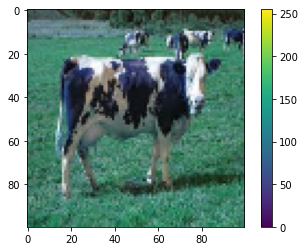

In [ ]:
# se muestra una imagen cualquiera del tipo de vaca montbeliade  para ver como se visualiza
print(montbeliades[4].shape)
plt.figure()
plt.imshow(np.squeeze(montbeliades[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Carga de imagenes de vacas tipo Belgian Blue

In [ ]:
 belgianBlue_path = "/content/Clasificacion-de-Vacas-IA/datos/belgianBlue"
 belgianBlues = []
 img_size = 100
 for img in os.listdir(belgianBlue_path):
   img = cv2.imread(os.path.join(belgianBlue_path, img))
   img_resize = cv2.resize(img, (img_size, img_size))
   belgianBlues.append(img_resize)

Verificacion de cantidad de imagenes belgianblue cargadas y proporciones de la imagen

In [ ]:
belgianBlues = np.array(belgianBlues)
print(belgianBlues.shape)
# cantidad, alto, ancho y escala de colores

(20, 100, 100, 3)


(100, 100, 3)


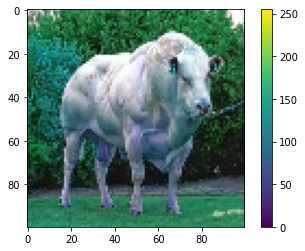

In [ ]:
# se muestra una imagen cualquiera del tipo de vaca belgian Blue  para ver como se visualiza
print(belgianBlues[4].shape)
plt.figure()
plt.imshow(np.squeeze(belgianBlues[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Carga de imagenes de vacas tipo Holstein

In [ ]:
holstein_path = "/content/Clasificacion-de-Vacas-IA/datos/holstein"
holsteins = []
img_size = 100
for img in os.listdir(holstein_path):
   img = cv2.imread(os.path.join(holstein_path, img))
   img_resize = cv2.resize(img, (img_size, img_size))
   holsteins.append(img_resize)

Verificacion de cantidad de imagenes holstein cargadas y proporciones de la imagen

In [ ]:
holsteins = np.array(holsteins)
print(holsteins.shape)
# cantidad, alto, ancho y escala de colores

(20, 100, 100, 3)


(100, 100, 3)


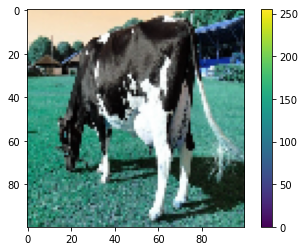

In [ ]:
# se muestra una imagen cualquiera del tipo de vaca holstein  para ver como se visualiza
print(holsteins[4].shape)
plt.figure()
plt.imshow(np.squeeze(holsteins[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Carga de imagenes de vacas tipo Limonsin Cattle

In [ ]:
limosin_cattle_path = "/content/Clasificacion-de-Vacas-IA/datos/limosin_cattle"
limosin_cattles = []
img_size = 100
for img in os.listdir(limosin_cattle_path):
   img = cv2.imread(os.path.join(limosin_cattle_path, img))
   img_resize = cv2.resize(img, (img_size, img_size))
   limosin_cattles.append(img_resize)

Verificacion de cantidad de imagenes limosin cattle cargadas y proporciones de la imagen

In [ ]:
limosin_cattles = np.array(limosin_cattles)
print(limosin_cattles.shape)
# cantidad, alto, ancho y escala de colores

(20, 100, 100, 3)


(100, 100, 3)


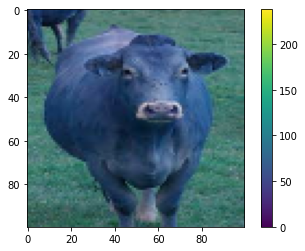

In [ ]:
# se muestra una imagen cualquiera del tipo de vaca limousin cattle para ver como se visualiza
print(limosin_cattles[4].shape)
plt.figure()
plt.imshow(np.squeeze(limosin_cattles[4]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#unifico las listas de cada tipo en una unica lista para despues generar etiquetas (tensores) por tipos de vacas
img_vacas = np.concatenate([montbeliades, belgianBlues, holsteins, limosin_cattles])
print(len(img_vacas))
#convierto la lista a un array
img_vacas = np.array(img_vacas)
#cantidad total de imagenes, alto, ancho, canales de color(RGB))
print(img_vacas.shape)

80
(80, 100, 100, 3)


In [ ]:
#Generamos los tensores para cada tipo de patron de vaca
label_montbeliade = np.repeat(0, 20)
label_belgianBlue = np.repeat(1, 20)
label_holstein = np.repeat(2, 20)
label_limosin_cattle = np.repeat(3, 20)

In [ ]:
#Generamos una clase para asociar los tensores creados a los tipos de vacas
class_names_vacas = ['Montbeliade', 'BelgianBlue', 'Holstein', 'Limosin_cattle']

In [ ]:
label_all = np.concatenate([label_montbeliade, label_belgianBlue, label_holstein, label_limosin_cattle])
label_all = np.array(label_all)

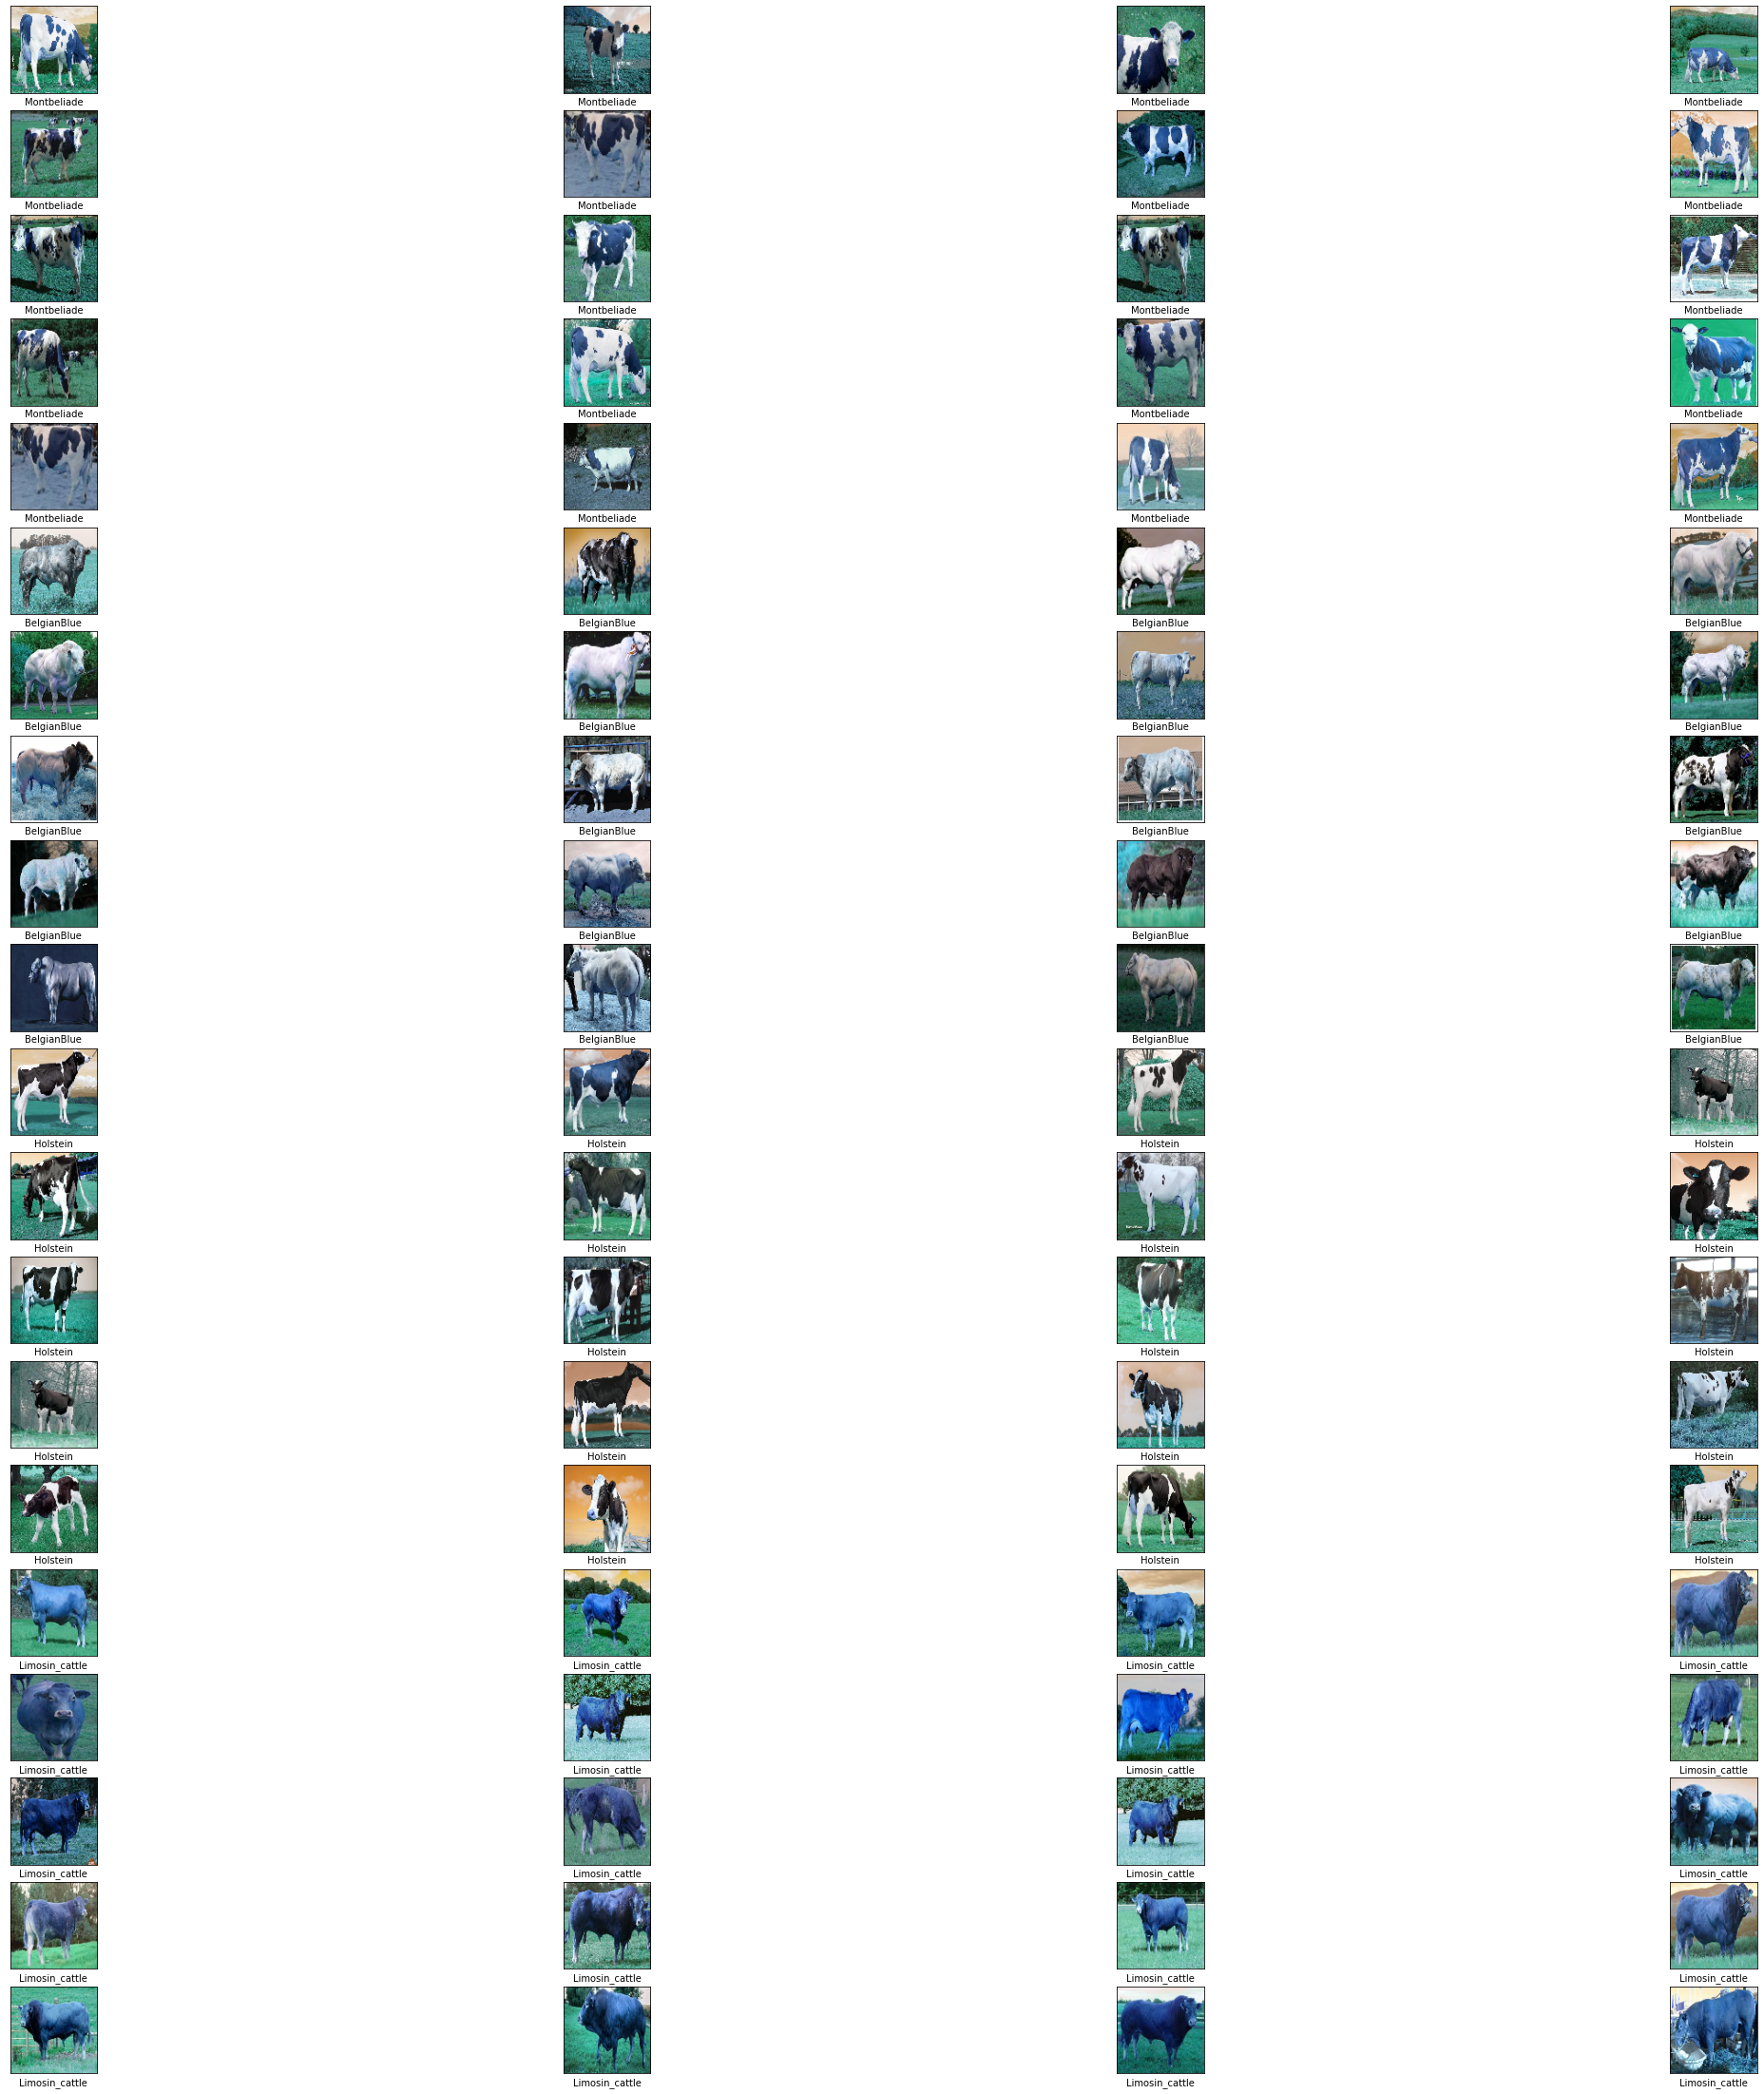

In [ ]:
plt.figure(figsize=(40,40))
for i in range(80):
    plt.subplot(20,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_vacas[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_vacas[label_all[i]])
plt.show()

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


# Construccion del modelo para la clasificacion 

In [ ]:
#configuracion de capas de erd neuronal artificial
model = keras.Sequential([
    #La primera capa de esta red, tf.keras.layers.Flatten, 
    # transforma el formato de las imagenes de un arreglo bi-dimensional (de 100 por 100 pixeles) 
    # a un arreglo uni dimensional (de 100*100 pixeles = 10000 pixeles).                      
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    
    #La secuencia consiste de 4 capastf.keras.layers.Dense
    #La primera capa Dense tiene 128 nodos (o neuronas)
    keras.layers.Dense(128, activation='relu'),
    
    #La segunda (y ultima) capa es una capa de 4 nodos softmax que devuelve un arreglo de 4 probabilidades que suman a 1.
    # Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 4 clases o tipos de vacass
    keras.layers.Dense(4, activation='softmax')
])

# Compilacion del modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del Modelo

In [ ]:
trained = model.fit(img_vacas, label_all, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 31ms/step - loss: 3055.9653 - accuracy: 0.3500
Epoch 2/30
3/3 [==============================] - 0s 35ms/step - loss: 13447.7109 - accuracy: 0.2500
Epoch 3/30
3/3 [==============================] - 0s 30ms/step - loss: 5881.4023 - accuracy: 0.2500
Epoch 4/30
3/3 [==============================] - 0s 33ms/step - loss: 1914.0192 - accuracy: 0.2125
Epoch 5/30
3/3 [==============================] - 0s 30ms/step - loss: 2753.6538 - accuracy: 0.4125
Epoch 6/30
3/3 [==============================] - 0s 26ms/step - loss: 2355.6707 - accuracy: 0.5375
Epoch 7/30
3/3 [==============================] - 0s 28ms/step - loss: 1496.5504 - accuracy: 0.4250
Epoch 8/30
3/3 [==============================] - 0s 27ms/step - loss: 706.9569 - accuracy: 0.5125
Epoch 9/30
3/3 [==============================] - 0s 28ms/step - loss: 836.8458 - accuracy: 0.5375
Epoch 10/30
3/3 [==============================] - 0s 28ms/step - loss: 774.8414 - accuracy: 0.4125
E

## Evaluacion del rendimiento del modelo

In [ ]:
test_loss, test_acc = model.evaluate(img_vacas,  label_all, verbose=2)
# mientras mas cerca de 1 mas eficiente es el modelo
print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 0.0000e+00 - accuracy: 1.0000

Test accuracy: 1.0


In [ ]:
#Luego del entrenamiento del modelo,tomamos una imagen de las que se cargaron para probar individualmente
prueba_vaca = img_vacas[45]
print(prueba_vaca.shape)

prueba_vaca = np.expand_dims(prueba_vaca, 0)
print(prueba_vaca.shape)

(100, 100, 3)
(1, 100, 100, 3)


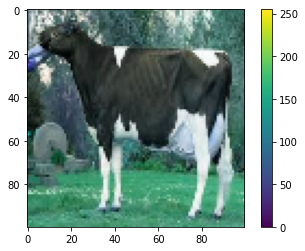

In [ ]:
plt.figure()
plt.imshow(img_vacas[45])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#se verifica la relacion tensor y class de una de las imagenes cargadas y ya entrenadas
predictions_single = model.predict(prueba_vaca)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Tipo de vaca relacionada : ", class_names_vacas[np.argmax(predictions_single)])

> Nro de Etiqueta o tensor:  2
> Tipo de vaca relacionada :  Holstein


# Prediccion

### Se suben imagenes nuevas de vacas para probar el aprendizaje del modelo durante el entrenamiento

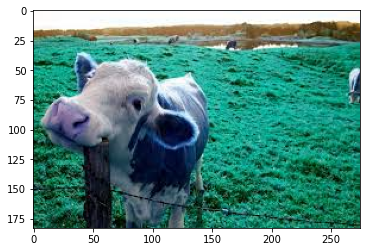

(1, 100, 100, 3)
> Nro de Etiqueta o tensor:  3
> Tipo de vaca relacionada :  Limosin_cattle


In [ ]:
#Ejemplo 1
img_a_predecir = cv2.imread('/content/Clasificacion-de-Vacas-IA/datos/predicciones/predic 1.jpg')

plt.imshow(img_a_predecir)
plt.show()
#se ajustan las dimensiones para que sea como las imagenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Tipo de vaca relacionada : ", class_names_vacas[np.argmax(predictions_single)])

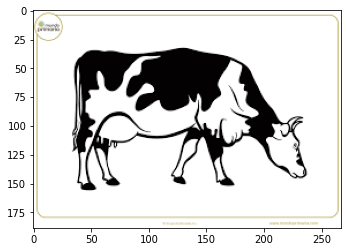

(1, 100, 100, 3)
> Nro de Etiqueta o tensor:  2
> Tipo de vaca relacionada :  Holstein


In [ ]:
#Ejemplo 2
img_a_predecir = cv2.imread('/content/Clasificacion-de-Vacas-IA/datos/predict 8.png')

plt.imshow(img_a_predecir)
plt.show()
#se ajustan las dimensiones para que sea como las imagenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Tipo de vaca relacionada : ", class_names_vacas[np.argmax(predictions_single)])